# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
# Libraries and packages import

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Wholesale_Data.csv")
print(df.shape)
df.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df.drop_duplicates(inplace = True)

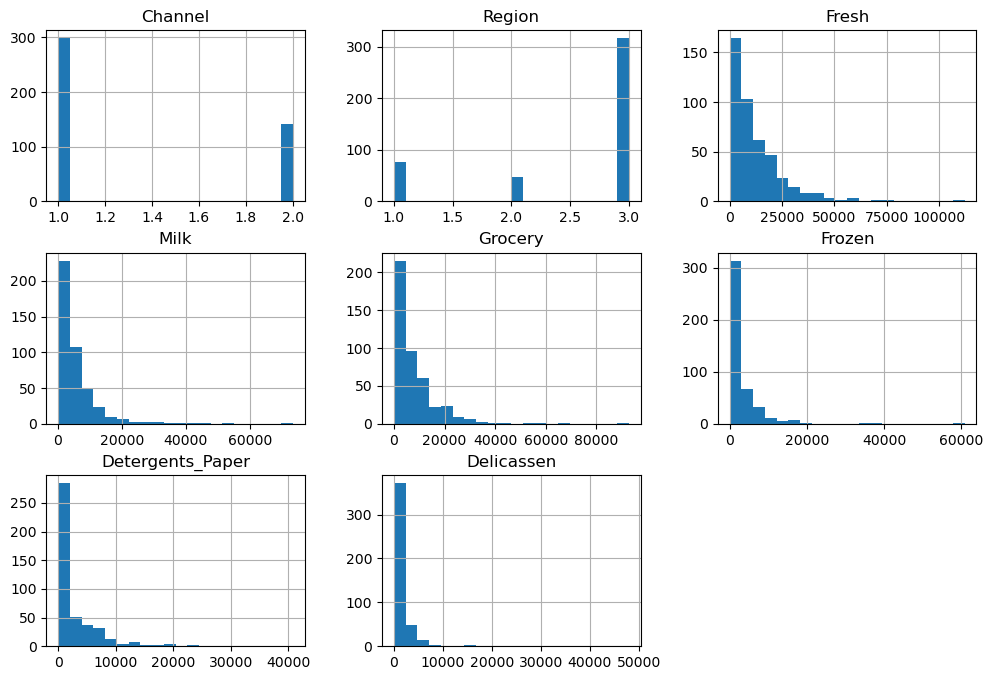

In [6]:
df.hist(bins=20, figsize=(12, 8))
plt.show()

* CHANNEL & REGION look like they are ordinal variables

* Most variables have outliers. They'll be removed using the IQR method


In [7]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)


for column in df.columns:
    remove_outliers(df, column)

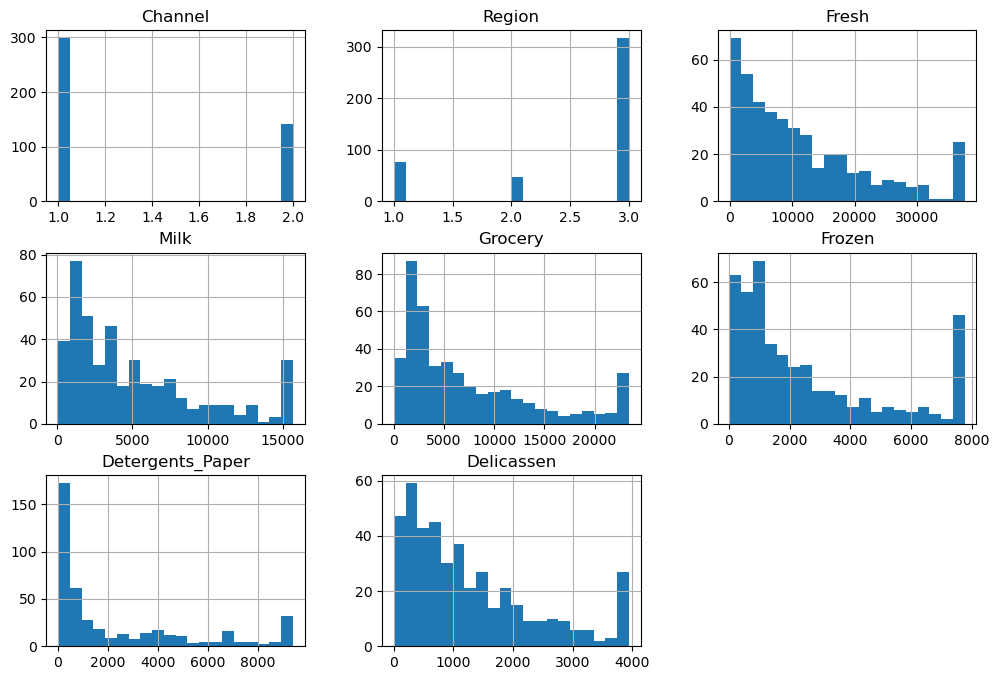

In [8]:
df.hist(bins=20, figsize=(12, 8))
plt.show()

In [9]:
correlation_matrix = df.corr()
correlation_matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.171717,0.598616,0.719867,-0.254707,0.790080,0.166639
Region,0.062028,1.000000,0.056523,0.005734,0.005301,-0.050604,0.004717,0.016801
Fresh,-0.171717,0.056523,1.000000,-0.037991,-0.098357,0.355487,-0.226033,0.259404
Milk,0.598616,0.005734,-0.037991,1.000000,0.781205,-0.037049,0.691217,0.372097
Grocery,0.719867,0.005301,-0.098357,0.781205,1.000000,-0.137456,0.877444,0.290121
Frozen,-0.254707,-0.050604,0.355487,-0.037049,-0.137456,1.000000,-0.239435,0.237178
Detergents_Paper,0.790080,0.004717,-0.226033,0.691217,0.877444,-0.239435,1.000000,0.161233
Delicassen,0.166639,0.016801,0.259404,0.372097,0.290121,0.237178,0.161233,1.000000


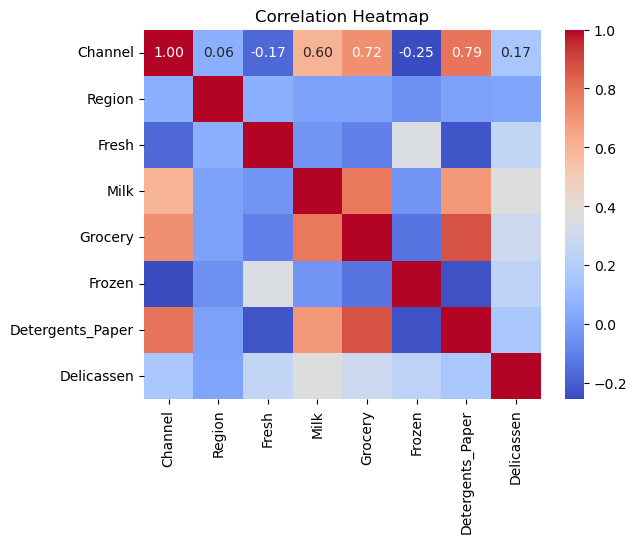

In [10]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

GROCERY & DETERGENTS_PAPER show the highest correlation with a value of 0.92.
Let's see a scatterplot between those variables:

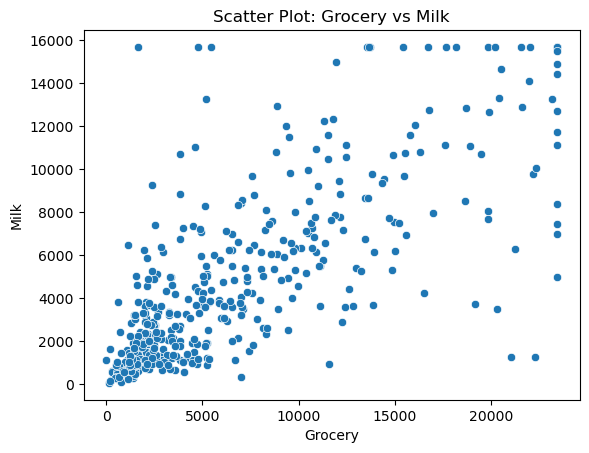

In [11]:
sns.scatterplot(x='Grocery', y='Milk', data=df)
plt.title('Scatter Plot: Grocery vs Milk')
plt.show()

In [12]:
columns_to_drop = ['Channel','Region']

df = df.drop(columns=columns_to_drop, axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

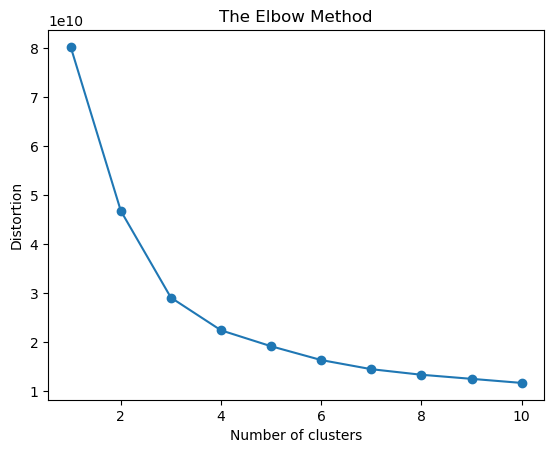

In [15]:
from sklearn.cluster import KMeans

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

plot_distortion(df,max_clusters=10)

According to the 'Elbow Method', 4 clusters seem to be right number

In [16]:
# Create KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the scaled data
kmeans.fit(df_scaled)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

In [17]:
# Add the cluster labels to your original DataFrame
df['Cluster'] = cluster_labels

# Display the first few rows of the DataFrame with cluster labels
print(df.head())

     Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Cluster
0  12669.0  9656.0   7561.0   214.0            2674.0     1338.00        1
1   7057.0  9810.0   9568.0  1762.0            3293.0     1776.00        2
2   6353.0  8808.0   7684.0  2405.0            3516.0     3938.25        0
3  13265.0  1196.0   4221.0  6404.0             507.0     1788.00        3
4  22615.0  5410.0   7198.0  3915.0            1777.0     3938.25        0


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram

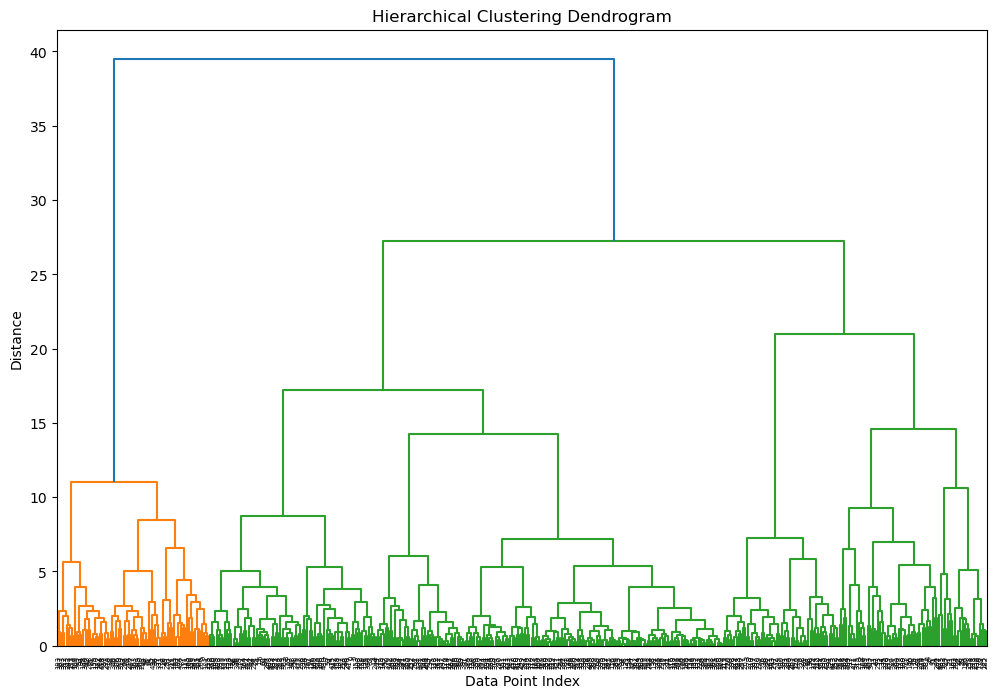

In [19]:
# Perform hierarchical clustering
linkage_matrix = linkage(df_scaled, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

3 clusters is the optimum using Hierarchical Clustering

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.45609037 0.26946547 0.10770689 0.10324488 0.04665828 0.01683412]


In [21]:
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.45609037 0.72555584 0.83326273 0.9365076  0.98316588 1.        ]


#### The 3 principal components explain 83% of the variance, and the 4 principal components, 93%

### Plotting the 4 clusters from K-Means

In [22]:
from mpl_toolkits.mplot3d import Axes3D

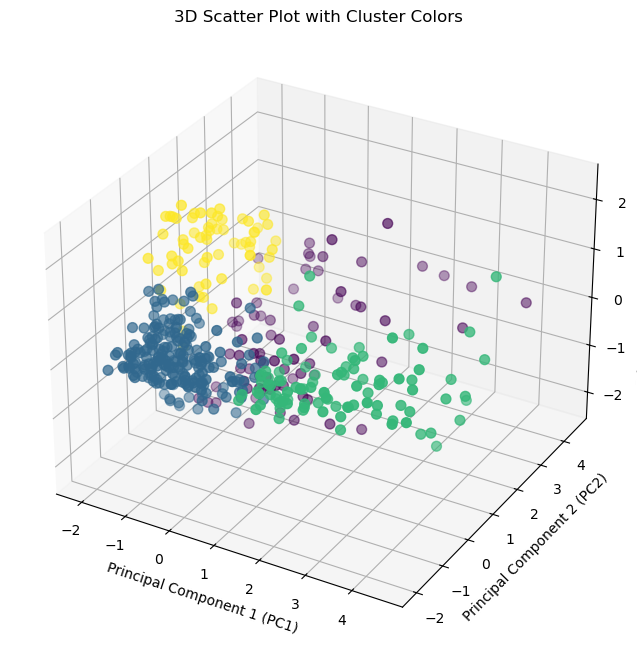

In [26]:
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=pca_result[:, :3], columns=['PC1', 'PC2', 'PC3'])  # Use only the first 3 principal components

# Assuming df is your original DataFrame
# Add cluster labels to the df_pca DataFrame
df_pca['Cluster'] = df['Cluster']  # Assuming 'Cluster' is the column containing cluster labels


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the three principal components
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')
ax.set_zlabel('Principal Component 3 (PC3)')
ax.set_title('3D Scatter Plot with Cluster Colors')

plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

#### Optimal Number of Clusters:

* The elbow method suggested that the optimal number of clusters for the wholesale data is 4. This was used as the number of clusters for both the KMeans and Hierarchical Clustering models.


#### Cluster Characteristics:

* After applying the clustering algorithms, distinct clusters were formed based on the features in the dataset. Each cluster represents a group of customers with similar purchasing behavior. Further analysis of cluster characteristics can provide insights into the preferences and needs of different customer segments. We can see the means down below.


#### Principal Components Analysis (PCA):

* Principal Components Analysis (PCA) was employed to reduce the dimensionality of the dataset. The first three principal components explained 83% of the variance. Visualization of these components in a 3D scatter plot revealed patterns and relationships between data points, especially when color-coded by cluster labels.



#### Showing each feature's mean for each Cluster

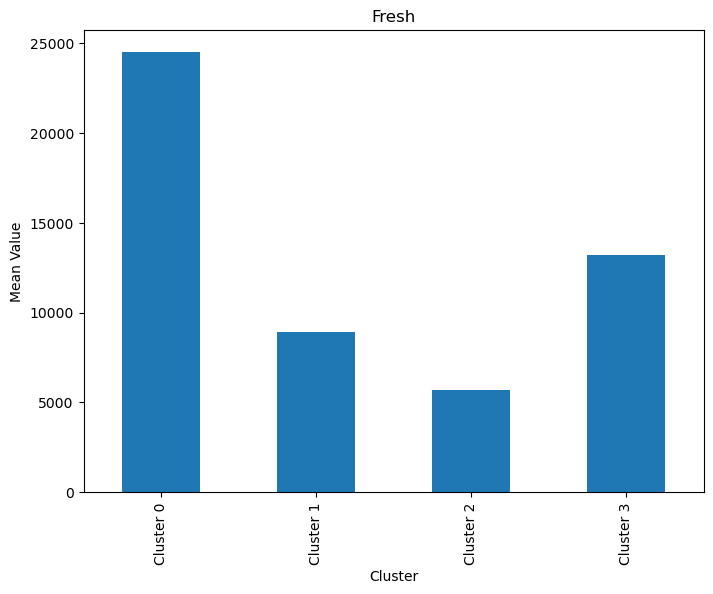

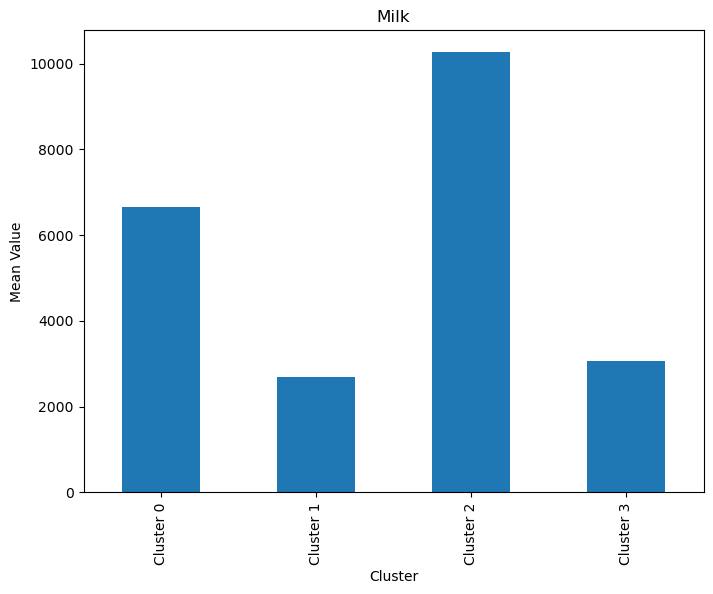

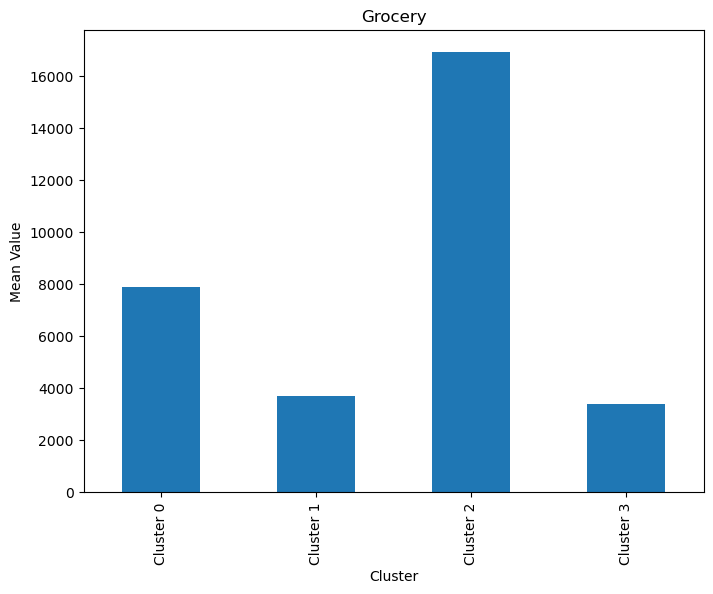

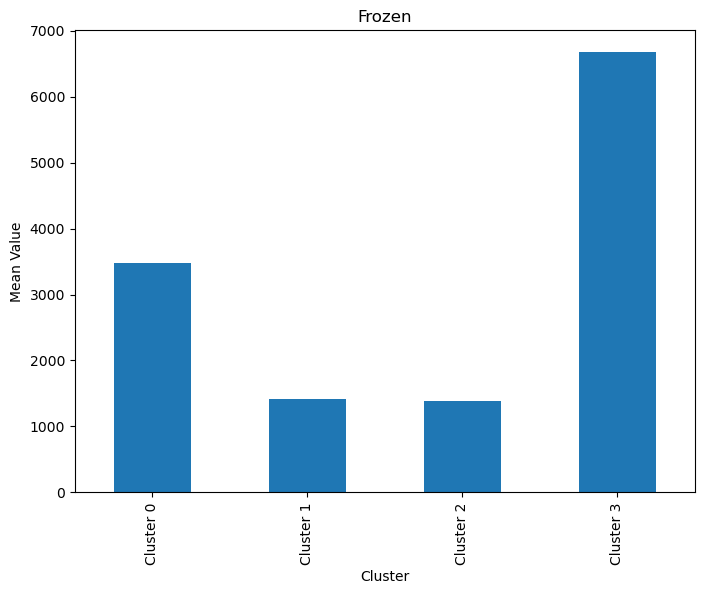

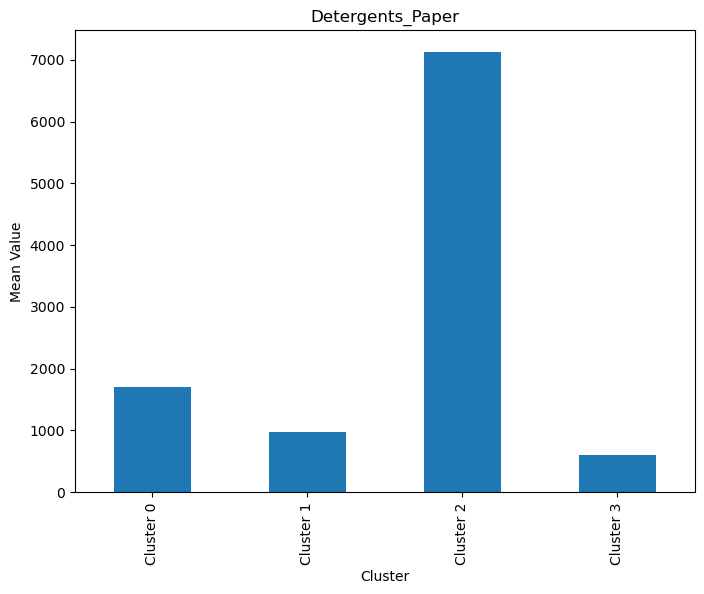

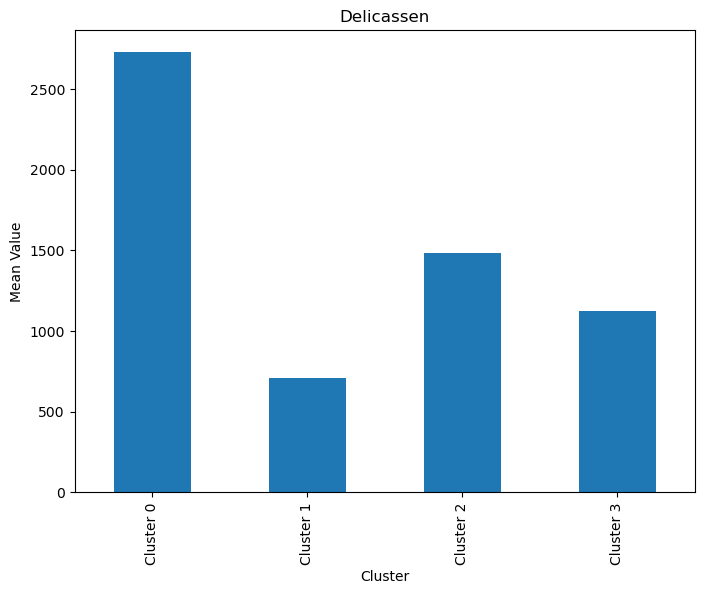

In [28]:
cluster_means = df.groupby('Cluster').mean()

cluster_means = cluster_means.transpose()


for feature in cluster_means.index:
    cluster_means.loc[feature].plot(kind='bar', figsize=(8,6))
    plt.title(feature)
    plt.ylabel('Mean Value')
    plt.xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    plt.show()